In [140]:
# !pip install kaggle

In [141]:
!pip install opendatasets

In [142]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database")

Skipping, found downloaded files in "./pima-indians-diabetes-database" (use force=True to force download)


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [144]:
df=pd.read_csv("/content/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [145]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [146]:
df.shape

(768, 9)

<ipython-input-147-2704a4375a11>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose)


<Axes: xlabel='Glucose', ylabel='Density'>

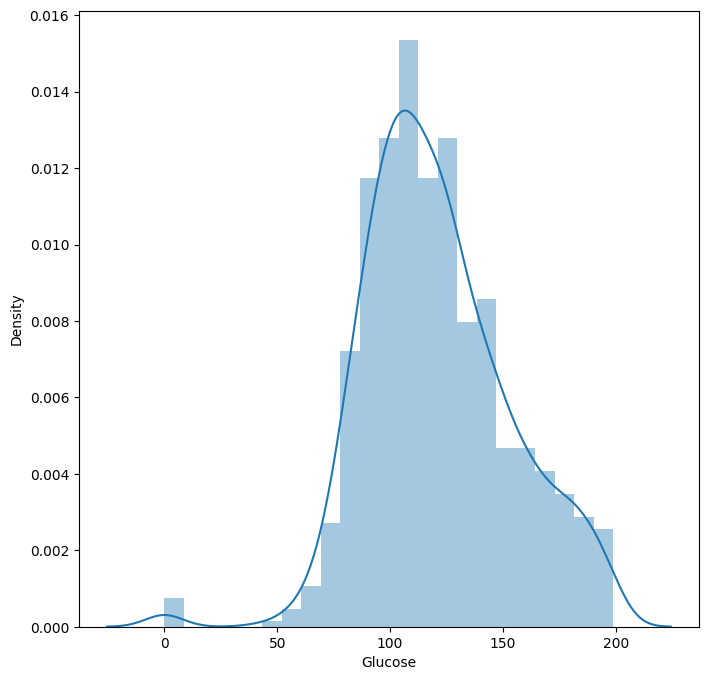

In [147]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(df.Glucose)

In [148]:
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_fix:
    df[column] = df[column].replace(0, df[column].median())

In [149]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [150]:
zero_counts = (df == 0).sum()

print("Number of zeros in each column:")
print(zero_counts)

Number of zeros in each column:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


<Axes: >

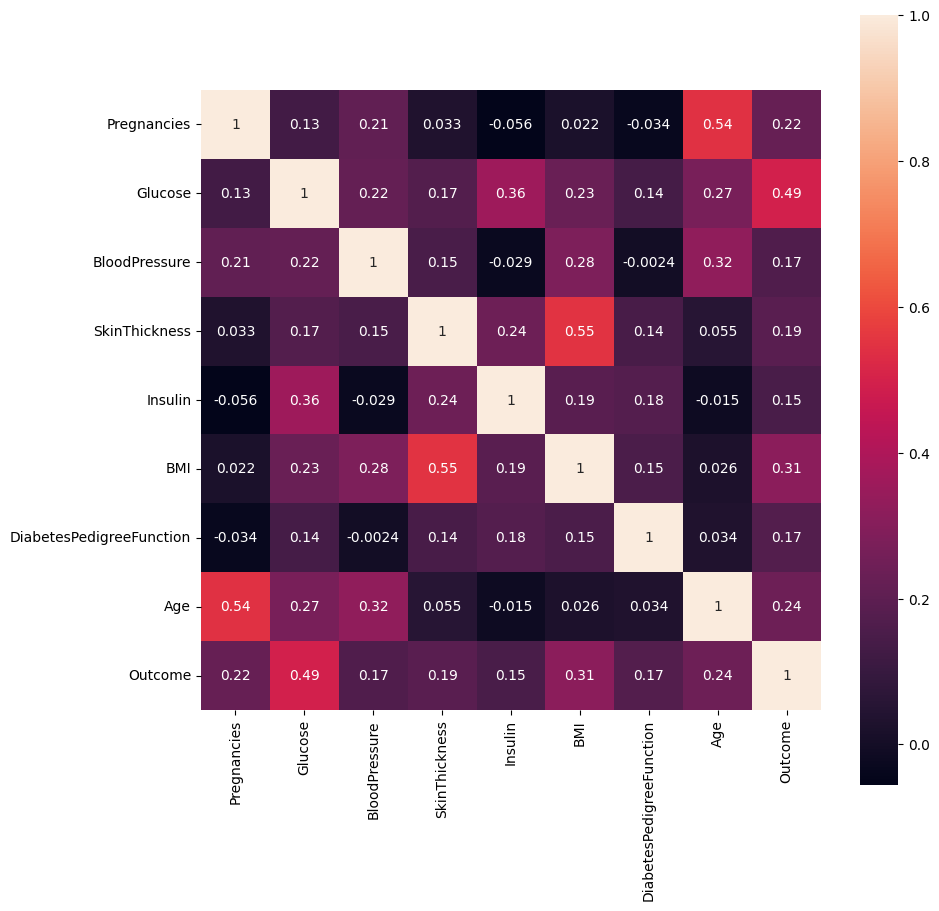

In [151]:
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,square=True)

In [152]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [153]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [154]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
model=RandomForestClassifier(n_estimators=38)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=38)

In [156]:
y_predict=model.predict(x_test)
model.score(x_test,y_test)

0.7792207792207793

In [157]:
print("Actual condition of the patient", y_test.iloc[0])
print("Predicted  condition of the patient", y_predict[0])

Actual condition of the patient 1
Predicted  condition of the patient 1


In [158]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[85, 19],
       [15, 35]])

Text(95.72222222222221, 0.5, 'Truth')

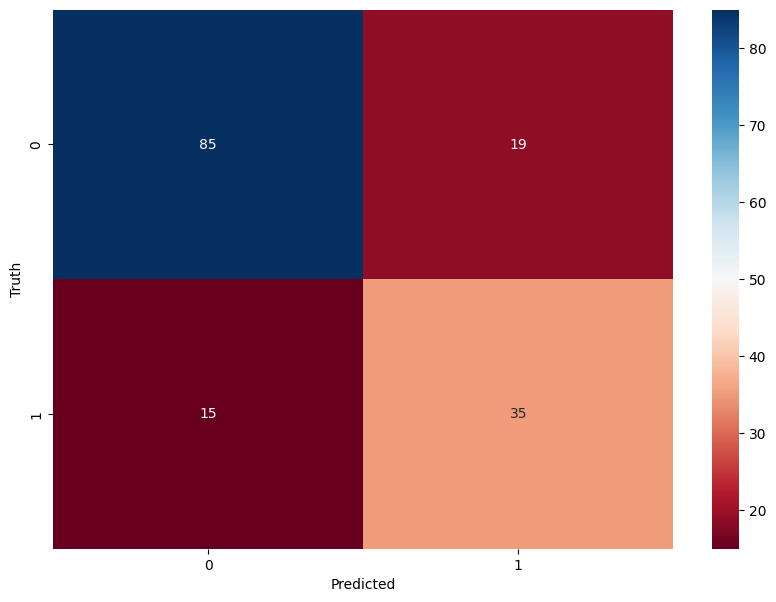

In [159]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,cmap="RdBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [160]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(scores.mean())


0.7604787369493252
